In [1]:
import requests
from bs4 import BeautifulSoup

In [12]:
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'class':'table_develop3'})

data = []
for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))
    for td in tds:
        if td.find('a'):
            point = td.find('a').text
            temperature = tds[5].text
            humidity = tds[9].text
            data.append([point,temperature,humidity])
data

[['서울', '25.6', '30'],
 ['백령도', '18.4', '62'],
 ['인천', '20.8', '54'],
 ['수원', '25.0', '41'],
 ['동두천', '24.9', '34'],
 ['파주', '25.1', '39'],
 ['강화', '20.0', '56'],
 ['양평', '25.5', '32'],
 ['이천', '25.6', '28'],
 ['북춘천', '24.6', '36'],
 ['북강릉', '19.9', '56'],
 ['울릉도', '16.8', '77'],
 ['속초', '19.1', '75'],
 ['철원', '23.9', '37'],
 ['대관령', '17.9', '49'],
 ['춘천', '25.7', '39'],
 ['강릉', '22.7', '41'],
 ['동해', '19.5', '77'],
 ['원주', '23.4', '36'],
 ['영월', '24.2', '34'],
 ['인제', '24.3', '31'],
 ['홍천', '25.4', '25'],
 ['태백', '19.6', '43'],
 ['정선군', '23.0', '32'],
 ['서산', '23.6', '49'],
 ['청주', '24.3', '33'],
 ['대전', '25.1', '37'],
 ['충주', '24.4', '32'],
 ['추풍령', '23.0', '35'],
 ['홍성(예)', '24.3', '46'],
 ['제천', '24.2', '32'],
 ['보은', '23.7', '28'],
 ['천안', '23.5', '35'],
 ['보령', '21.4', '56'],
 ['부여', '23.9', '37'],
 ['금산', '23.7', '30'],
 ['전주', '24.9', '44'],
 ['광주', '24.0', '35'],
 ['목포', '22.8', '51'],
 ['여수', '22.8', '49'],
 ['흑산도', '19.2', '93'],
 ['군산', '21.8', '55'],
 ['완도', '23.2', '45'],

In [7]:
table

<table class="table_develop3" summary="기상실황표로 지점, 날씨, 기온, 강수, 바람, 기압등을 안내한 표입니다.">
<caption>기상실황표</caption>
<colgroup>
<col width="14%"/>
<col width="12%"/>
<col width="7%"/>
<col width="5%"/>
<col width="8%"/>
<col width="5%"/>
<col width="6%"/>
<col width="5%"/>
<col width="8%"/>
<col width="5%"/>
<col width="8%"/>
<col width="6%"/>
<col width="*%"/>
</colgroup>
<thead>
<tr class="table_header" id="table_header1">
<th class="top_line" rowspan="2" scope="col">
		지점
		</th>
<th class="top_line" colspan="4" scope="col">날씨</th>
<th class="top_line" colspan="3" scope="col">기온(℃)</th>
<th class="top_line" colspan="2" scope="col">강수</th>
<th class="top_line" colspan="2" scope="col">바람</th>
<th class="top_line" scope="col">기압(hPa)</th>
</tr>
<tr class="table_header" id="table_header2">
<th class="nm" scope="col">현재일기 </th>
<th class="nm" scope="col">시정<br/>km</th>
<th class="nm" scope="col">운량<br/>1/10</th>
<th class="nm" scope="col">중하운량</th>
<th class="nm" scope="col">현재<br/>기온</th>
<th cl

# 46.3.4 데이터를 csv파일에 저장하기.

In [14]:
with open('weather.csv', 'w') as file:
    file.write('point,temperature,humidity\n')
    for i in data:
        file.write('{0},{1},{2}\n'.format(i[0],i[1],i[2]))

# 46.3.5 데이터로 그래프 그리기

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font = "Malgun Gothic")
df = pd.read_csv("weather.csv", index_col = "point", encoding = "cp949")
df

,temperature,humidity
point,,
서울,25.6,30
백령도,18.4,62
인천,20.8,54
수원,25.0,41
동두천,24.9,34
...,...,...
합천,25.1,32
밀양,24.7,34
산청,24.8,41


In [19]:
city_df = df.loc[['서울','인천','대구','대전','광주','울산','부산']]
city_df

,temperature,humidity
point,,
서울,25.6,30
인천,20.8,54
대구,25.7,31
대전,25.1,37
광주,24.0,35
울산,19.7,70
부산,20.2,66


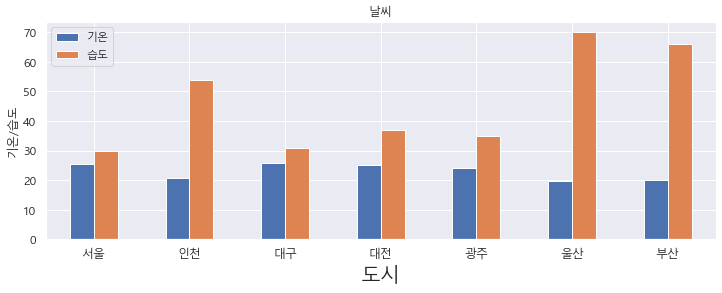

In [28]:
ax = city_df.plot(kind = 'bar', title = "날씨", figsize= (12,4), legend = True, fontsize = 12)
ax.set_xlabel('도시', fontsize = 20)
ax.set_ylabel('기온/습도')
plt.xticks(rotation = 0)
ax.legend(['기온','습도'])